## Import modules and data

In [1]:
# https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data/AMZN.csv')
df.head()

,Date,Close
0,7/2/2018,1713.780029
1,7/3/2018,1693.959961
2,7/5/2018,1699.729980
3,7/6/2018,1710.630005
4,7/9/2018,1739.020020


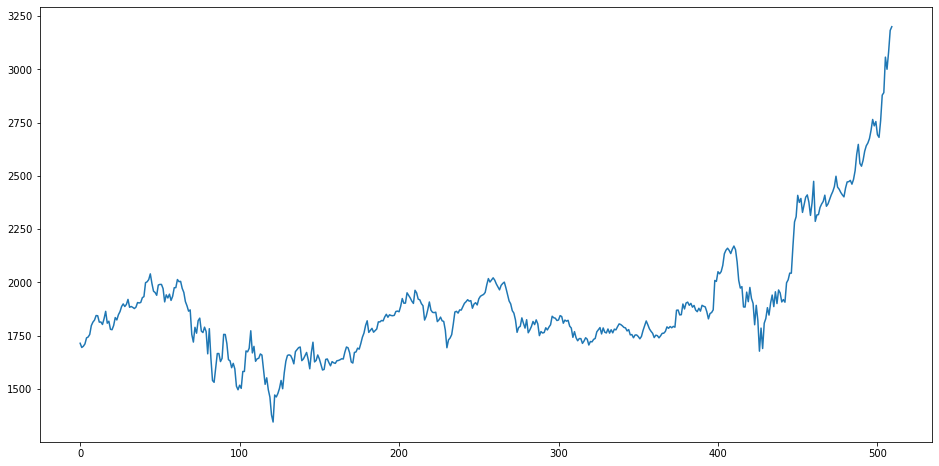

In [3]:
# What historical stock prices actually looked like
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
model_data = df.iloc[0:370,:]
model_data.head()

,Date,Close
0,2018-07-02,1713.780029
1,2018-07-03,1693.959961
2,2018-07-05,1699.729980
3,2018-07-06,1710.630005
4,2018-07-09,1739.020020


## Create and train the model

In [5]:
# Use train, test, split to training and testing data
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_data)):
    input_data.append(model_data.loc[i-60:i,"Close"])
    output_data.append(model_data.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [8]:
# Fit the model
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train_scaled,y_train_scaled,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.2060
Epoch 2/5
8/8 - 2s - loss: 0.0355
Epoch 3/5
8/8 - 2s - loss: 0.0230
Epoch 4/5
8/8 - 1s - loss: 0.0115
Epoch 5/5
8/8 - 1s - loss: 0.0125


## Test the model

In [9]:
# Reshape testing data to fit model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [10]:
# Evaluate the model using the testing data
model_loss = lstm_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

3/3 - 0s - loss: 0.0137
Loss: 0.013735244050621986


In [11]:
# Predict y values for test data to see how closely they match actual values
predicted_closing_price=lstm_model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[1767.8723],
       [1889.3599],
       [1666.6517],
       [1639.5121],
       [1741.6512],
       [1600.614 ],
       [1675.1244],
       [1823.9152],
       [1797.3756],
       [1644.1393],
       [1620.5499],
       [1847.1508],
       [1764.9844],
       [1760.4457],
       [1774.1688],
       [1766.0804],
       [1902.2379],
       [1865.9333],
       [1843.6858],
       [1829.3888],
       [1605.8182],
       [1662.2317],
       [1798.4141],
       [1910.3212],
       [1628.6449],
       [1795.0292],
       [1677.9766],
       [1704.2563],
       [1761.0481],
       [1789.8157],
       [1670.4103],
       [1899.3275],
       [1666.236 ],
       [1755.8229],
       [1672.2542],
       [1662.2614],
       [1640.766 ],
       [1819.222 ],
       [1877.2343],
       [1702.3516],
       [1647.406 ],
       [1756.1283],
       [1797.8264],
       [1794.4857],
       [1767.677 ],
       [1871.2177],
       [1800.827 ],
       [1898.726 ],
       [1771.4065],
       [1637.5544],


In [12]:
predictions = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [13]:
test_data = pd.DataFrame({"Predicted": predictions})
test_data

,Predicted
0,1767.872314
1,1889.359863
2,1666.651733
3,1639.512085
4,1741.651245
...,...
73,1704.273560
74,1783.302490
75,1746.909546
76,1671.087158


In [14]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[1752.790039],
       [1870.319946],
       [1551.47998 ],
       [1377.449951],
       [1598.01001 ],
       [1461.640015],
       [1588.219971],
       [1911.300049],
       [1822.550049],
       [1690.170044],
       [1674.560059],
       [1859.680054],
       [1800.800049],
       [1769.209961],
       [1753.109985],
       [1745.530029],
       [1952.76001 ],
       [1889.97998 ],
       [1815.47998 ],
       [1816.319946],
       [1640.560059],
       [1641.089966],
       [1844.869995],
       [2000.810059],
       [1683.780029],
       [1754.359985],
       [1673.099976],
       [1636.849976],
       [1779.98999 ],
       [1739.839966],
       [1692.430054],
       [2004.359985],
       [1670.569946],
       [1705.51001 ],
       [1591.      ],
       [1631.560059],
       [1673.569946],
       [1764.030029],
       [2001.069946],
       [1797.27002 ],
       [1581.329956],
       [1530.420044],
       [1869.670044],
       [1839.339966],
       [1769.959961],
       [20

In [15]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
test_data["Actual"] = actuals
test_data

,Predicted,Actual
0,1767.872314,1752.790039
1,1889.359863,1870.319946
2,1666.651733,1551.479980
3,1639.512085,1377.449951
4,1741.651245,1598.010010
...,...,...
73,1704.273560,1755.489990
74,1783.302490,1642.810059
75,1746.909546,1731.920044
76,1671.087158,1520.910034


In [16]:
lstm_model.save("../models/AMZN_model.h5")

## Use the model to predict stock prices 

In [17]:
inputs = []

for i in range(370,len(df)):
    inputs.append(df.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = lstm_model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[1763.7607],
       [1765.2029],
       [1766.7678],
       [1768.2498],
       [1771.884 ],
       [1776.6376],
       [1781.675 ],
       [1786.4011],
       [1792.1841],
       [1797.8336],
       [1804.1505],
       [1810.4062],
       [1816.2325],
       [1821.6937],
       [1826.1652],
       [1830.1848],
       [1833.0396],
       [1834.8788],
       [1836.3567],
       [1837.4333],
       [1838.8206],
       [1839.9327],
       [1840.977 ],
       [1841.2894],
       [1840.1729],
       [1839.044 ],
       [1837.7365],
       [1837.0508],
       [1840.2853],
       [1845.6473],
       [1853.8777],
       [1862.6547],
       [1872.2759],
       [1882.5864],
       [1894.5289],
       [1907.4391],
       [1920.5808],
       [1933.0247],
       [1943.97  ],
       [1954.1968],
       [1964.0651],
       [1972.6265],
       [1978.7279],
       [1980.7704],
       [1979.1332],
       [1975.4808],
       [1967.8884],
       [1958.4883],
       [1949.752 ],
       [1940.8053],


In [20]:
forecasts = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecast_data = df.iloc[370:,:]
forecast_data

,Date,Close
370,2019-12-19,1792.280029
371,2019-12-20,1786.500000
372,2019-12-23,1793.000000
373,2019-12-24,1789.209961
374,2019-12-26,1868.770020
...,...,...
505,2020-07-06,3057.040039
506,2020-07-07,3000.120117
507,2020-07-08,3081.110107
508,2020-07-09,3182.629883


In [22]:
forecast_data["Prediction"] = forecasts
forecast_data

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
370,2019-12-19,1792.280029,1763.760742
371,2019-12-20,1786.500000,1765.202881
372,2019-12-23,1793.000000,1766.767822
373,2019-12-24,1789.209961,1768.249756
374,2019-12-26,1868.770020,1771.884033
...,...,...,...
505,2020-07-06,3057.040039,2296.062012
506,2020-07-07,3000.120117,2307.124023
507,2020-07-08,3081.110107,2319.689453
508,2020-07-09,3182.629883,2333.645752


In [23]:
forecast_data.to_csv("../data/predictions/AMZN.csv")

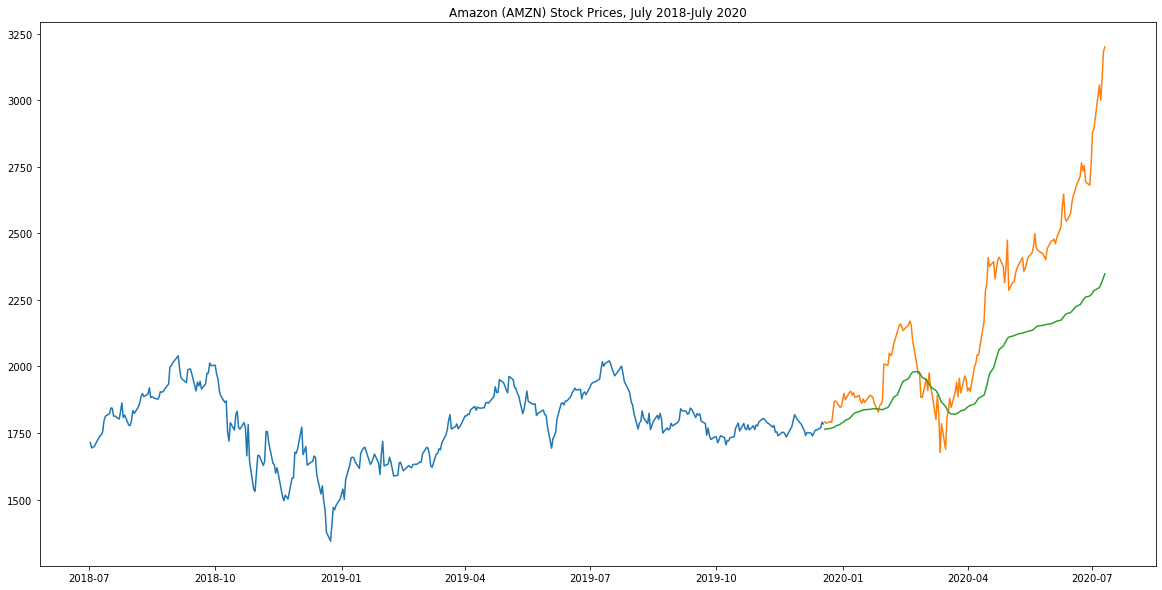

In [25]:
model_data = model_data.set_index("Date")
forecast_data = forecast_data.set_index("Date")
plt.plot(model_data["Close"])
plt.plot(forecast_data[['Close',"Prediction"]])
plt.title("Amazon (AMZN) Stock Prices, July 2018-July 2020")
plt.savefig("../charts/AMZN.png")